### Import Libraries

In [54]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the Fitness data from the csv file

In [55]:
fitness=pd.read_csv('Dataset/cardioActivities.csv',parse_dates=True,index_col=0)
fitness.head()

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx


In [56]:
fitness.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

In [57]:
fitness.nunique()

Activity Id                 508
Type                          4
Route Name                    1
Distance (km)               363
Duration                    458
Average Pace                146
Average Speed (km/h)        271
Calories Burned             406
Climb (m)                   218
Average Heart Rate (bpm)     49
Friend's Tagged               0
Notes                         7
GPX File                    504
dtype: int64

In [58]:
fitness.Type.value_counts()

Running    459
Cycling     29
Walking     18
Other        2
Name: Type, dtype: int64

### Data Pre-Processing

#### Columns 'Friend's Tagged', 'Notes','Route Name','GPX File','Activity Id','Calories Burned' can be dropped

In [59]:
columns_to_drop={'Friend\'s Tagged', 'Notes','Route Name','GPX File','Activity Id','Calories Burned'}
fitness=fitness.drop(columns=columns_to_drop,axis=1)
fitness.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      508 non-null    object 
 1   Distance (km)             508 non-null    float64
 2   Duration                  508 non-null    object 
 3   Average Pace              508 non-null    object 
 4   Average Speed (km/h)      508 non-null    float64
 5   Climb (m)                 508 non-null    int64  
 6   Average Heart Rate (bpm)  294 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 31.8+ KB


In [60]:
run_data=fitness[fitness.Type=='Running']
cycle_data=fitness[fitness.Type=='Cycling']
walk_data=fitness[fitness.Type=='Walking']

In [61]:
print(run_data.isnull().sum())
print(cycle_data.isnull().sum())
print(walk_data.isnull().sum())

Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    182
dtype: int64
Type                         0
Distance (km)                0
Duration                     0
Average Pace                 0
Average Speed (km/h)         0
Climb (m)                    0
Average Heart Rate (bpm)    14
dtype: int64
Type                         0
Distance (km)                0
Duration                     0
Average Pace                 0
Average Speed (km/h)         0
Climb (m)                    0
Average Heart Rate (bpm)    18
dtype: int64


#### Average Heart Rate (bpm) still has null values but it can be replaced by the mean of the Average Heart Rates for each type of activity. For walk, average of run can be provided as it does not have any values

In [62]:
fitness.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      508 non-null    object 
 1   Distance (km)             508 non-null    float64
 2   Duration                  508 non-null    object 
 3   Average Pace              508 non-null    object 
 4   Average Speed (km/h)      508 non-null    float64
 5   Climb (m)                 508 non-null    int64  
 6   Average Heart Rate (bpm)  294 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 31.8+ KB


In [63]:
# Finding average for each type of activity
avg_run_hr=fitness[fitness.Type=='Running']['Average Heart Rate (bpm)'].mean()
avg_cycle_hr=fitness[fitness.Type=='Cycling']['Average Heart Rate (bpm)'].mean()
avg_walk_hr=fitness[fitness.Type=='Walking']['Average Heart Rate (bpm)'].mean()

fitness[fitness.Type=='Running']['Average Heart Rate (bpm)'].fillna(int(avg_run_hr),inplace=True)
fitness[fitness.Type=='Cycling']['Average Heart Rate (bpm)'].fillna(int(avg_cycle_hr),inplace=True)
fitness[fitness.Type=='Walking']['Average Heart Rate (bpm)'].fillna(int(avg_run_hr),inplace=True)

C:\Users\Durga P T M\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [64]:
fitness[fitness.Type=='Running']['Average Heart Rate (bpm)'].fillna(int(avg_run_hr),inplace=True)
fitness.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      508 non-null    object 
 1   Distance (km)             508 non-null    float64
 2   Duration                  508 non-null    object 
 3   Average Pace              508 non-null    object 
 4   Average Speed (km/h)      508 non-null    float64
 5   Climb (m)                 508 non-null    int64  
 6   Average Heart Rate (bpm)  294 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 31.8+ KB


In [13]:
run_data['Average Heart Rate (bpm)'].fillna(int(avg_run_hr),inplace=True)
cycle_data['Average Heart Rate (bpm)'].fillna(int(avg_cycle_hr),inplace=True)
walk_data['Average Heart Rate (bpm)'].fillna(int(avg_run_hr),inplace=True)

C:\Users\Durga P T M\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


### Plot Data

In [11]:
# Ignore Warnings
plt.style.use('ggplot')
warnings.filterwarnings(action='ignore',module='matplotlib.figure',category=UserWarning,
                        message=('This fig has axes which are not compatible with tight_layout, so the results might be incorrect'))

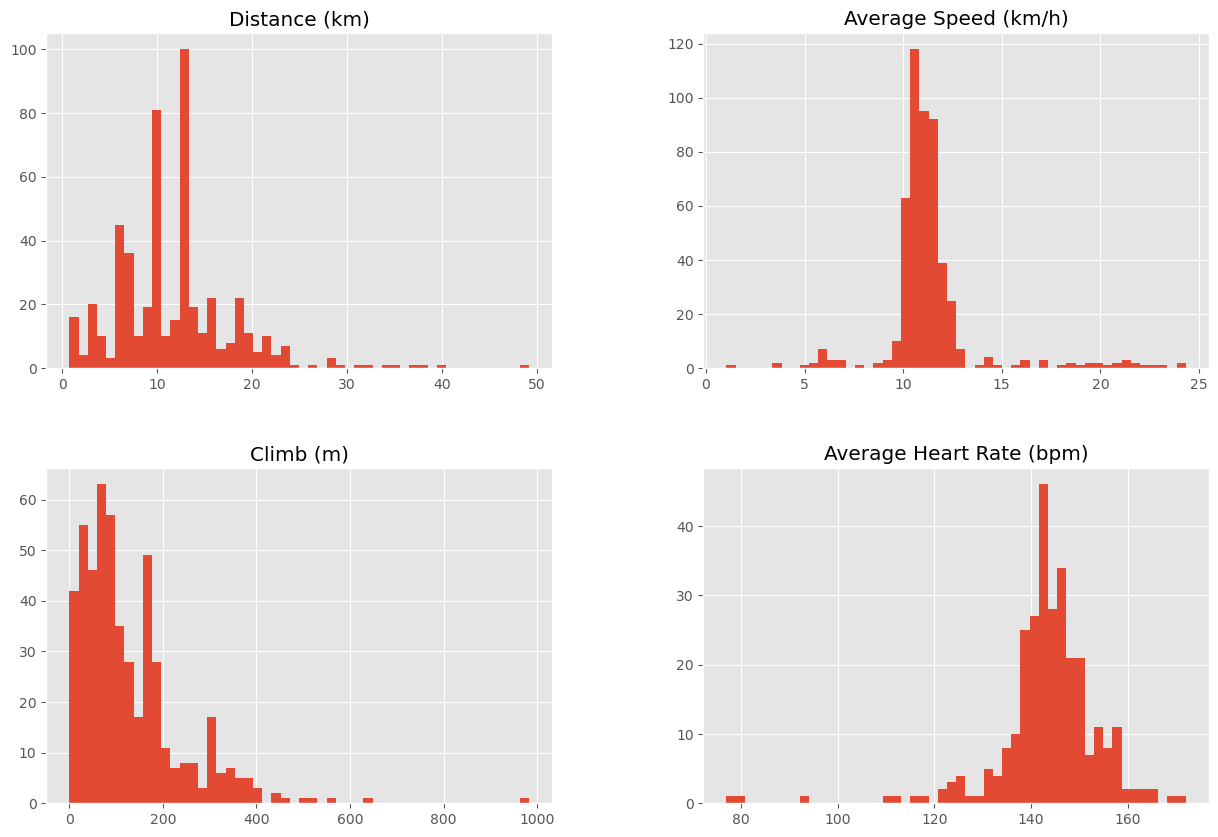

In [12]:
fitness.hist(bins=50,figsize=(15,10))
plt.show()

C:\Users\Durga P T M\AppData\Local\Temp\ipykernel_12620\2521331207.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(GraphRow,5,i+1)
C:\Users\Durga P T M\AppData\Local\Temp\ipykernel_12620\2521331207.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(GraphRow,5,i+1)


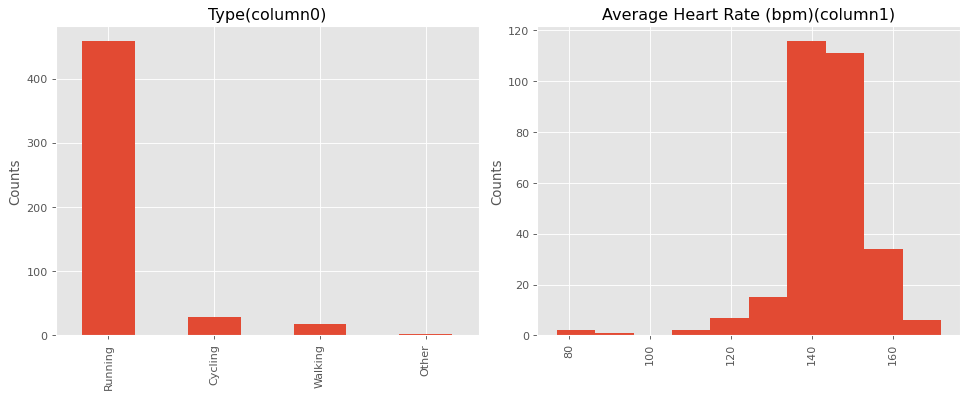

In [18]:
nunique=fitness.nunique()
fitness=fitness[[col for col in fitness if nunique[col]>1 and nunique[col]<50]]
row,col=fitness.shape
col_name=list(fitness)
GraphRow=(col+5-1)/5
plt.figure(num=None,figsize=(6*5,4*GraphRow),dpi=80,facecolor='w',edgecolor='k')
for i in range(min(col,10)):
    plt.subplot(GraphRow,5,i+1)
    col_df=fitness.iloc[:,i]
    if(not np.issubdtype(type(col_df.iloc[0]),np.number)):
        val_count=col_df.value_counts()
        val_count.plot.bar()
    else:
        col_df.hist()
    plt.ylabel('Counts')
    plt.xticks(rotation=90)
    plt.title(f'{col_name[i]}(column{i})')
plt.tight_layout(pad=0.1,w_pad=1.0,h_pad=1.0)
plt.show()

In [20]:
fitness

,Type,Average Heart Rate (bpm)
Date,,
2018-11-11 14:05:12,Running,159.0
2018-11-09 15:02:35,Running,159.0
2018-11-04 16:05:00,Running,155.0
2018-11-01 14:03:58,Running,158.0
2018-10-27 17:01:36,Running,154.0
...,...,...
2012-08-28 07:06:57,Walking,NaN
2012-08-24 12:59:42,Walking,NaN
2012-08-24 10:12:16,Walking,NaN


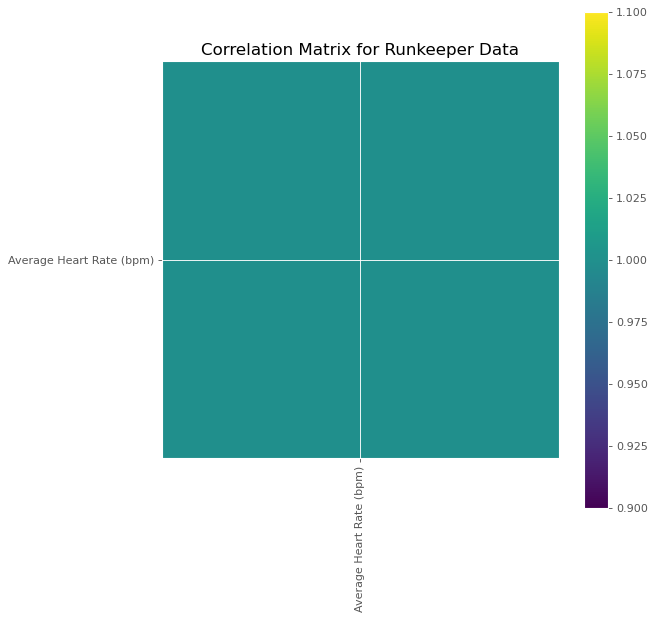

In [23]:
fitness=fitness[[col for col in fitness if nunique[col]>1]]
if fitness.shape[1] < 2:
    print(f'No correlation plots shown:The number of constant columns ({fitness.shape[1]}) is less than 2')
corr=fitness.corr()
plt.figure(num=None,figsize=(8,8),dpi=80,facecolor='w',edgecolor='k')
corrmat=plt.matshow(corr,fignum=1)
plt.xticks(range(len(corr.columns)),corr.columns,rotation=90)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrmat)
plt.title('Correlation Matrix for Runkeeper Data',fontsize=15)
plt.show()